<a href="https://colab.research.google.com/github/ayush572/House_price_prediction_model/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#bfcba8">**Installing NumPy**</font>

NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering.  The NumPy API is used extensively in `Pandas`, `SciPy`, `Matplotlib`, `scikit-learn`, `scikit-image` and most other data science and scientific Python packages.

The NumPy library contains *multidimensional array* and *matrix data structures* . It provides `ndarray` (a homogeneous n-dimensional array object, with methods to efficiently operate on it)

NumPy can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.


# <font color="#bfcba8">**Installing NumPy**</font>

- how to install numpy in personal machine
- how to install in colab
- what is `pip`
- why `pip`
- [pyPI](https://pypi.org/)


# <font color="#bfcba8">**How to use NumPy**</font>
- `import` statement
- why we import as np?


# <font color="#bfcba8">**Difference between python list and numpy arrays**</font>

NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.



# <font color="#bfcba8"> **What is an array?**</font>
-  `ndarray`, which is shorthand for “N-dimensional array.” An N-dimensional array is simply an array with any number of dimensions.
- You might also hear 1-D, or one-dimensional array, 2-D, or two-dimensional array, and so on. The NumPy ndarray class is used to represent both matrices and vectors. A vector is an array with a single dimension (there’s no difference between row and column vectors), while a matrix refers to an array with two dimensions. For 3-D or higher dimensional arrays, the term tensor is also commonly used.

### **What are the attributes of an array?**

# <font color="#bfcba8"> **How to create a basic array**</font> 

### **Specifying your data type**

While the default data type is floating point (np.float64), you can explicitly specify which data type you want using the dtype keyword.

# <font color="#bfcba8"> **How do you know the shape and size of an array?**</font>  




# <font color="#bfcba8">  Adding, removing, and sorting elements

# <font color="#bfcba8">  Indexing and slicing </font>


# <font color="#bfcba8">  Create Arrays </font>



`np.ones()` , `np.zeros()` , `np.arange()` , `np.empty()`








# <font color="#bfcba8">  Stacking and Concatenate Elements </font>

---




# <font color="#bfcba8">  Reshaping an Array </font>

# <font color="#bfcba8">  Basic Linear Algebra </font>
- Addition
- Substraction
- Multiplication
- Division
- matrix multiplication

- inverse of tensor (linalg)


- I need Help 
- max,min,sum,mean,std,unique
- savetxt
- loadtxt
- 

In [ ]:
#please scroll below

# New Section

In [ ]:
#first run this cell please
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#TRAINING MODEL
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
data.drop(['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir'], inplace=True, axis=1)
data.drop(['HeatingQC','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'], inplace=True, axis=1)

data=data.dropna(axis=1)
data.head()
#print(data.isnull().values.any())
#print(data.isna().any())
#data.info()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
arr=data.to_numpy()
m,n=np.shape(arr)
x=arr[:,:n-1]
y=arr[:,n-1]
print(arr.shape)
print(x.shape)
print(y.shape)

(1460, 34)
(1460, 33)
(1460,)


In [ ]:
x_mean=np.mean((x), axis=0)
x_mean.shape
x_std=np.std((x), axis=0)
x=(x-x_mean)/(x_std)

arr_of_ones=np.ones((x.shape[0],1))
x=np.hstack((arr_of_ones,x))
print(x.shape)

(1460, 34)
[[ 1.          0.07337496 -0.20714171 ... -0.08768781 -1.5991111
   0.13877749]
 [ 1.         -0.87256276 -0.09188637 ... -0.08768781 -0.48911005
  -0.61443862]
 [ 1.          0.07337496  0.07347998 ... -0.08768781  0.99089135
   0.13877749]
 ...
 [ 1.          0.30985939 -0.14781027 ...  4.95311151 -0.48911005
   1.64520971]
 [ 1.         -0.87256276 -0.08016039 ... -0.08768781 -0.8591104
   1.64520971]
 [ 1.         -0.87256276 -0.05811155 ... -0.08768781 -0.1191097
   0.13877749]]


In [ ]:
print(x)

[[ 1.          0.07337496 -0.20714171 ... -0.08768781 -1.5991111
   0.13877749]
 [ 1.         -0.87256276 -0.09188637 ... -0.08768781 -0.48911005
  -0.61443862]
 [ 1.          0.07337496  0.07347998 ... -0.08768781  0.99089135
   0.13877749]
 ...
 [ 1.          0.30985939 -0.14781027 ...  4.95311151 -0.48911005
   1.64520971]
 [ 1.         -0.87256276 -0.08016039 ... -0.08768781 -0.8591104
   1.64520971]
 [ 1.         -0.87256276 -0.05811155 ... -0.08768781 -0.1191097
   0.13877749]]


In [ ]:
arrp=np.zeros((x.shape[1],1))
learn_rate=0.001
y=np.reshape(y,(-1,1)) #-1 means it will automatically take the number of rows of y
#so, we DONT NEED to see and put it there, MANUALLY.
for z in range(1000):
  for j in range(x.shape[1]): #to iterate through each column for parameter modification
                    #, b=34 columns
    #arrp1=np.array(arrp,dtype='int32')
    pred=np.matmul(x,arrp)
    #mul=np.array(mul,dtype='int32') 
    sum=0 #taken here because, for each parameter editing, the sum need to be 0
      #as we will be calculating and modifying each parameter 
    sum=np.sum(np.matmul((x.T[j]),((pred-y))))

    #print(np.shape(sum))
    #print(sum)
    arrp[j][0]=arrp[j][0]-((learn_rate)*(sum)) #modification of each parameters
  #loss=np.sum(((pred-y)**2))/(y.shape[0])
  #print(arrp)
print(arrp)#parameters array printing'''

[[180921.19589041]
 [ -6878.79757652]
 [  3953.50296901]
 [ 24754.16428757]
 [  4915.54764563]
 [ 10466.35628018]
 [  2828.9775948 ]
 [ 13427.22010351]
 [  2400.82684194]
 [  8129.13486619]
 [ -3386.84761856]
 [ 32204.25851255]
 [ 36411.93030139]
 [  2843.20414612]
 [-17183.07465666]
 [  4427.33005978]
 [   588.84889326]
 [  1970.22016718]
 [  -667.03076183]
 [ -8587.83601071]
 [ -2847.5058447 ]
 [  8339.17798023]
 [  2318.00312933]
 [  7944.03895733]
 [   298.41478439]
 [  3304.38908752]
 [  -372.19142197]
 [   532.89923573]
 [   550.13837237]
 [  3226.46773771]
 [ -1711.51674379]
 [  -442.01695378]
 [  -311.7527348 ]
 [ -1005.87852816]]


In [ ]:
#Testing of data
data1=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
data1.head()
data1.drop(['Id','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir'], inplace=True, axis=1)
data1.drop(['HeatingQC','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition','PoolQC','Fence','MiscFeature','GarageCond','GarageQual'], inplace=True, axis=1)
data1.drop(['GarageType','GarageFinish','FireplaceQu','Electrical','GarageYrBlt','MasVnrArea','LotFrontage'], inplace=True, axis=1)
#data1.head()
#print(data1.info())
#print(data.info())
column_means=data1.mean()
data1=data1.fillna(column_means)
#data1.isnull().any()

In [ ]:
orig_arr=data1.to_numpy()
n1=orig_arr.shape[1]
x1=orig_arr[:,:n1]

In [ ]:
x1_mean=np.mean((x1), axis=0)
x1_std=np.std((x1), axis=0)
x1=(x1-x1_mean)/x1_std
x1_ones=np.ones((x1.shape[0],1))
x1=np.hstack((x1_ones,x1))

In [ ]:
print(x1.shape)

(1459, 34)


In [ ]:
y_pred=np.matmul(x1,arrp)
#Here I have created another object data2, because, I want to get the value of X-axis of the graph which I have plotted below
data2=pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')
arr8=data2.to_numpy()
arrx=arr8[:,0] #done only to plot the graph, this will be x-axis
print(arrx) 

[1461. 1462. 1463. ... 2917. 2918. 2919.]


In [ ]:
#data3 has been created, so as to read the y_orig from sample_submission
data3=pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')
data3.drop(['Id'], inplace=True, axis=1) #Id has been droped, as I only want the y_orig
original=data3.to_numpy()
print(original.shape)
y_orig=original
print(y_pred)
print(y_orig)

(1459, 1)
[[126967.85991216]
 [159186.58127282]
 [183395.57341605]
 ...
 [186920.61920681]
 [109148.1035541 ]
 [260181.40803949]]
[[169277.0524984 ]
 [187758.39398877]
 [183583.68356955]
 ...
 [219222.42340006]
 [184924.279659  ]
 [187741.86665748]]


In [ ]:
#to fing r2 score
p=y_orig-y_pred
p=p**2
y_bar=np.mean(y_orig)
b=y_orig-y_bar
b=b**2
s1=np.sum(p)
s2=np.sum(b)
r2_score=1-(s1/s2)
print(r2_score)

-15.174147709755793


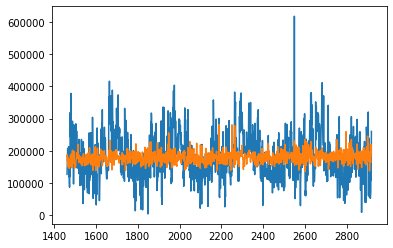

In [ ]:
#graph plotting between predicted and original values
#Blue graph-->prediction model, to predict the house price
#Orange graph-->actual value price of the house
#X-axis has the Id-->arrx
from matplotlib import pyplot as plt
plt.plot(arrx,y_pred) #arrx has the values 1461, 1462,... i.e, Id's
plt.plot(arrx,y_orig)
#for arrx refer sample_submission file in the dataset directory